# Part II - Presentation
## Eslam Elassal

## Investigation Overview

This presentation aims to demonstrate who uses the Ford Go-Bike system and for what purposes.

It appears that men in their twenties and thirties are the primary users of the Go-Bikes. The majority of trips take less than fifteen minutes and are completed by subscribers, or individuals who frequently use the bikes and most likely reside nearby. This implies that they are not being utilized for recreational or exercise cycling, but rather for commuting to and from work.

Non-subscribers, who are probably tourists or one-time users, typically travel farther and slower, indicating that they are exploring the city rather than rushing from point A to point B.


## Dataset Overview and Executive Summary

The dataset utilized in this analysis was gathered in 2019 and includes details on more than 170,000 trips taken by Ford Go-Bikes throughout the greater San Francisco region. I've noticed the following:
The majority of users are male, the majority are between the ages of 20 and 35, the average trip takes less than 15 minutes, the average trip is less than 2 kilometers, the majority are subscribers, and subscribers use the bikes for shorter trips than other users.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [11]:
# load dataset
df = pd.read_csv('go_bike_clean.csv')

## (Figure 1)

These two pie charts display the gender, user type, and ratios for the relevant categorical data for each journey. Here, we can observe that more than 90% of users are subscribers, and over 75% of users are men.

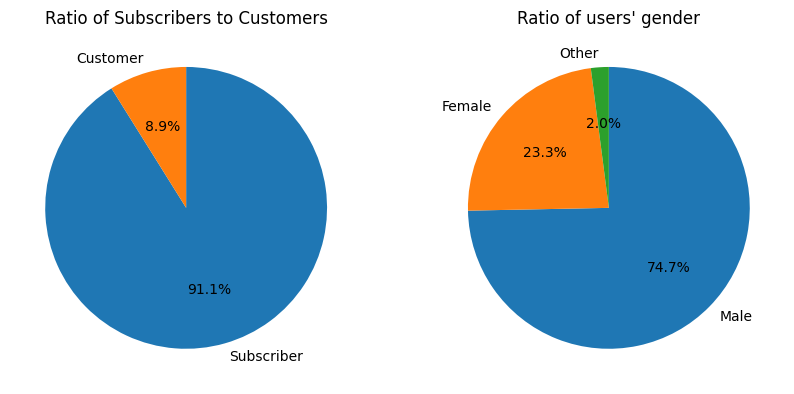

In [12]:
plt.figure(figsize = [10, 10])
plt.subplot(1, 2, 1)
user_type = df.user_type.value_counts()
plt.pie(user_type, labels = user_type.index, startangle = 90, counterclock = False, autopct='%.1f%%');
plt.title('Ratio of Subscribers to Customers');
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
gender = df.member_gender.value_counts()
plt.pie(gender, labels = gender.index, startangle = 90, counterclock = False, autopct='%.1f%%');
plt.title("Ratio of users' gender");

## (Figure 2)

The distribution for each of the four continuous data types—distance, duration, speed, and age—is displayed in these four histograms. These show that: the majority of users are under 40 years old; the most frequent journey length is less than 2 km; the average journey time is less than 15 minutes; and the average speed is 11 km/h.

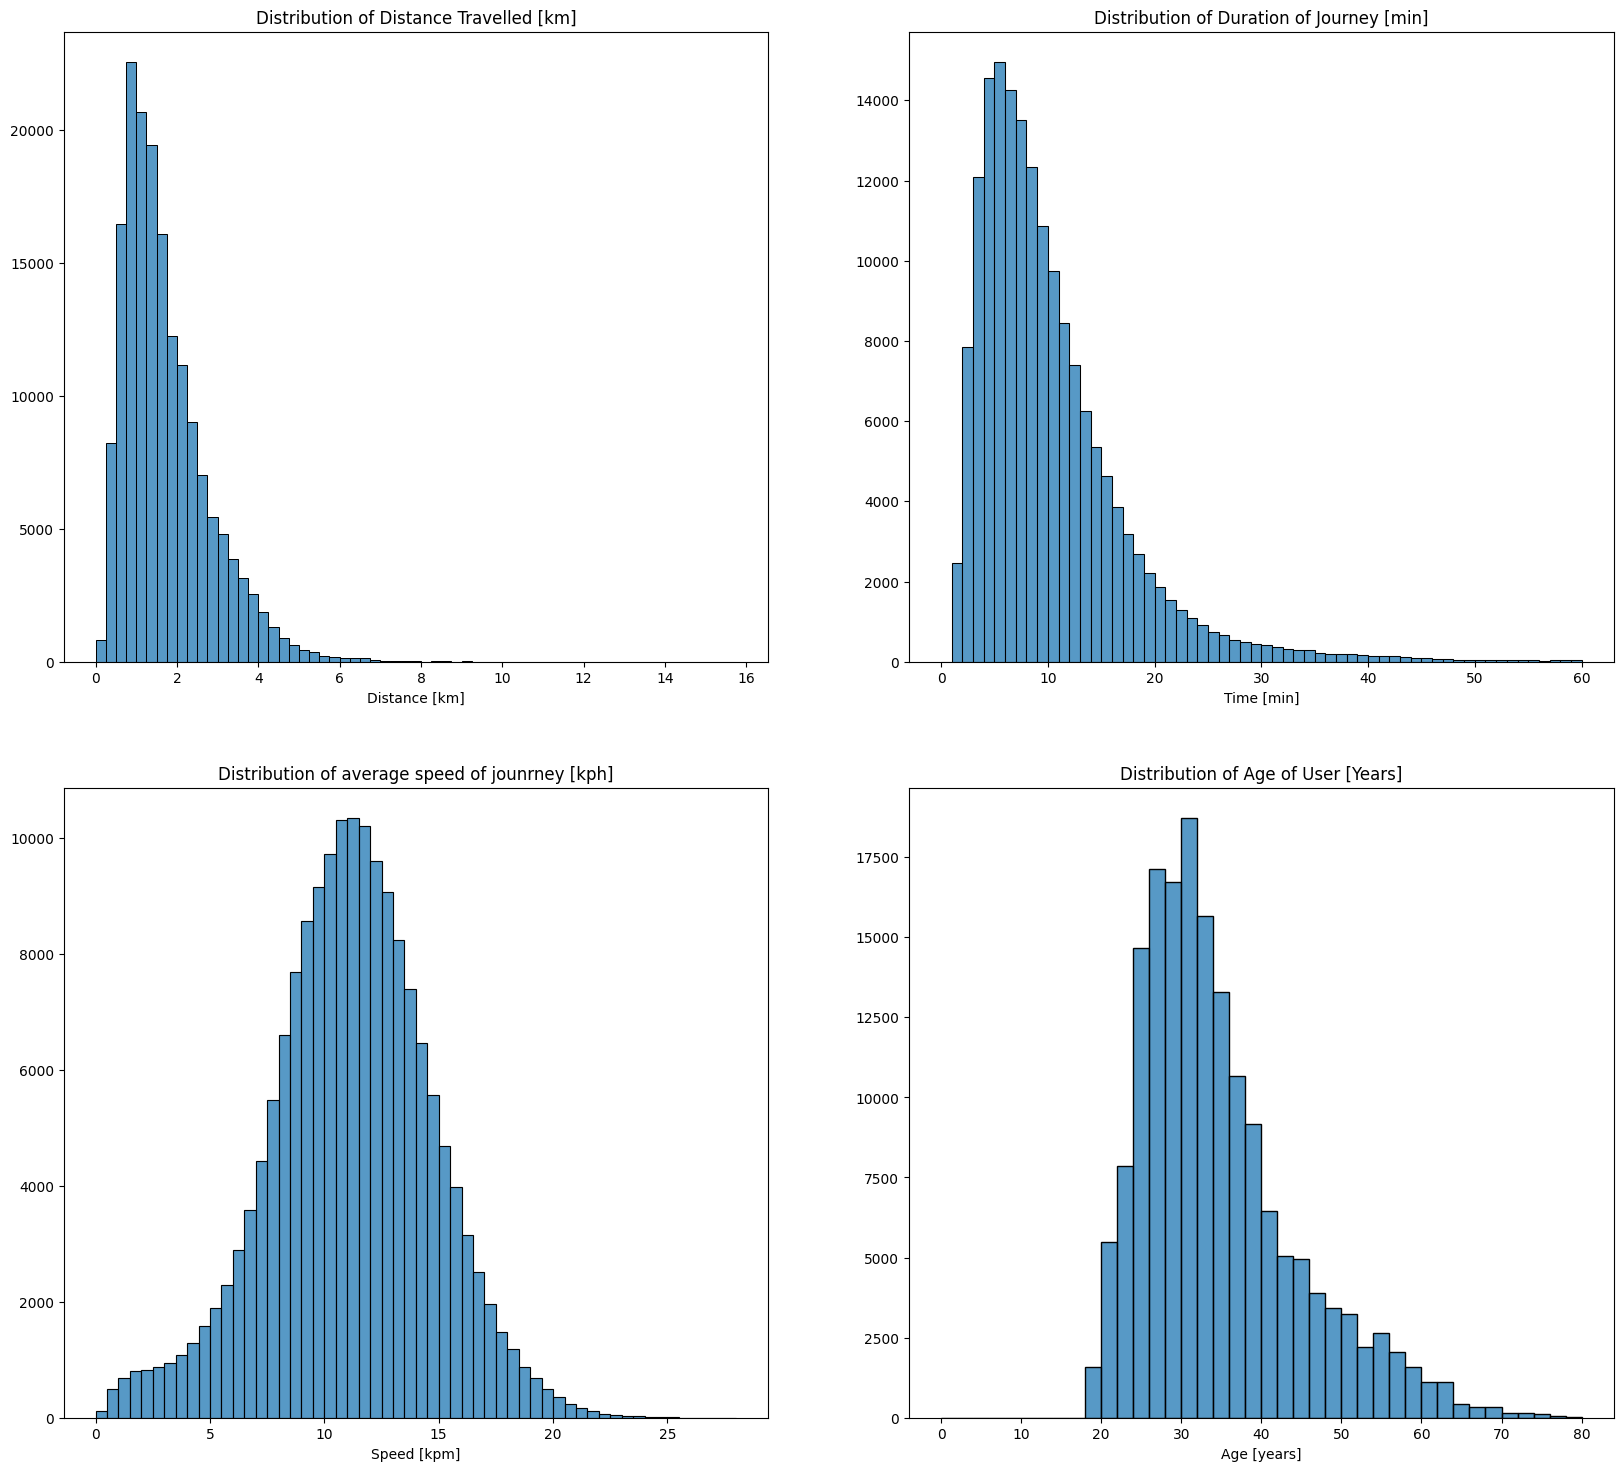

In [13]:
plt.figure(figsize = [20, 18])
plt.subplot(2, 2, 1)
bins = np.arange(0, df['distance'].max()+0.25, 0.25)
sns.histplot(data=df, x='distance', bins=bins);
plt.title("Distribution of Distance Travelled [km]");
plt.xlabel('Distance [km]');
plt.ylabel('');
plt.subplot(2, 2, 2)
bins = np.arange(0, df['duration_min'].max()+1, 1)
sns.histplot(data=df, x='duration_min', bins=bins);
plt.title("Distribution of Duration of Journey [min]");
plt.xlabel('Time [min]');
plt.ylabel('');
plt.subplot(2, 2, 3)
bins = np.arange(0, df['speed'].max()+0.5, 0.5)
sns.histplot(data=df, x='speed', bins=bins);
plt.title("Distribution of average speed of jounrney [kph]");
plt.xlabel('Speed [kpm]');
plt.ylabel('');
plt.subplot(2, 2, 4)
bins = np.arange(0, df['age'].max()+2, 2)
sns.histplot(data=df, x='age', bins=bins);
plt.title("Distribution of Age of User [Years]");
plt.xlabel('Age [years]');
plt.ylabel('');

## (Figure 3)

The differences in utilization between subscribers and customers are represented by these violin graphs. Compared to customers, subscribers typically go farther and faster in shorter trips.

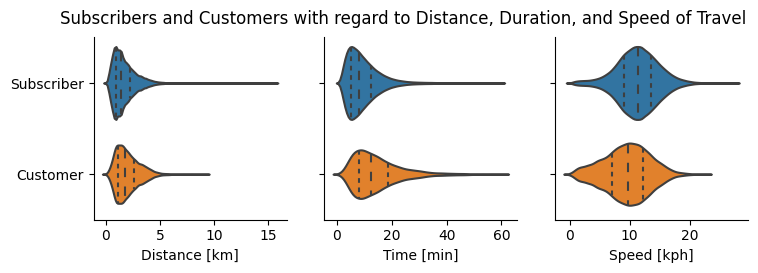

In [14]:
df1 = df.copy()
df1 = df1.rename(columns={'distance': 'Distance [km]', 'duration_min': 'Time [min]', 'speed':'Speed [kph]'})
g = sns.PairGrid(data=df1, x_vars=['Distance [km]', 'Time [min]', 'Speed [kph]'], y_vars=['user_type']);
g.map(sns.violinplot, inner='quartile');
g.set(ylabel = '')
g.fig.suptitle('Subscribers and Customers with regard to Distance, Duration, and Speed of Travel', y = 1.05);